In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib as mpl
import sys
mpl.rcParams['figure.figsize'] = (20,11)
from uuid import uuid4
import networkx as nx 
from tqdm.notebook import tqdm
tqdm.pandas()
from IPython.display import clear_output
import re
from io import StringIO
import zipfile
import pickle
sns.set_context('poster')
import numpy as np


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from  VDeepJUnbondedDataset import VDeepJUnbondedDataset
UBdataset = VDeepJUnbondedDataset(mutation_rate=0.08)
def get_reverse_dict(dic):
    return {i:j for j,i in dic.items()}
call_maps = {
    'v_family':get_reverse_dict(UBdataset.v_family_call_ohe),
    'v_gene':get_reverse_dict(UBdataset.v_gene_call_ohe),
    'v_allele':get_reverse_dict(UBdataset.v_allele_call_ohe),
    'd_family':get_reverse_dict(UBdataset.d_family_call_ohe),
    'd_gene':get_reverse_dict(UBdataset.d_gene_call_ohe),
    'd_allele':get_reverse_dict(UBdataset.d_allele_call_ohe),
    'j_gene':get_reverse_dict(UBdataset.j_gene_call_ohe),
    'j_allele':get_reverse_dict(UBdataset.j_allele_call_ohe),

}

In [5]:
from VDeepJUnbondedDataset import get_genotype

gt = get_genotype()

Requested proportion heterozygous genes: 1 for V genes, maximum proportion possible given: 0.91
Requested proportion heterozygous genes: 1 for D genes, maximum proportion possible given: 0.16
Requested proportion heterozygous genes: 1 for J genes, maximum proportion possible given: 0.67


In [12]:
gt[0]['V'][0].name

'IGHVF5-G30*03'

In [3]:
import tarfile
import csv
import io

with tarfile.open("C:/Users/Tomas/Downloads/1M_data_igblast.tar.gz", 'r:gz') as tar:

    for member in tar.getmembers():
        if member.name.endswith('.tsv'):
            f = tar.extractfile(member)
            tsv_contents = f.read().decode('utf-8')
            igb = csv.reader(io.StringIO(tsv_contents), delimiter='\t')
IGB = pd.read_table(io.StringIO(tsv_contents))


In [4]:
new_data = pd.read_table(r'C:\Users\Tomas\Downloads\sim_data_1M.tsv',usecols=['sequence', 'v_call', 'd_call', 'j_call', 'v_sequence_end',
                                           'd_sequence_start',
                                           'j_sequence_start',
                                           'j_sequence_end', 'd_sequence_end', 'v_sequence_start','unmutated_sequence'])

In [5]:
new_data = new_data.set_index('sequence')


In [6]:
IGB = IGB.set_index('sequence')

In [7]:
order = pd.read_parquet('1M_eval_preidcted_using_VDeepJ07_order.parquet')['sequence']

In [8]:
new_data = new_data.loc[order,:].reset_index()
IGB = IGB.loc[order,:].reset_index()

In [9]:
with open('1M_eval_preidcted_using_VDeepJ07.pkl','rb') as h:
    predictions = pickle.load(h)

In [10]:
pred_v_family,pred_d_family = predictions['v_family'],predictions['d_family']
pred_v_gene,pred_d_gene,pred_j_gene = predictions['v_gene'],predictions['d_gene'],predictions['j_gene']
pred_v_allele,pred_d_allele,pred_j_allele = predictions['v_allele'],predictions['d_allele'],predictions['j_allele']

In [11]:
len(pred_v_family)

999589

In [14]:
pred_v_family

array([[1.43272737e-05, 5.28772848e-09, 9.99854565e-01, ...,
        2.65622147e-09, 6.26208057e-05, 2.78586182e-10],
       [2.85731312e-06, 1.33123442e-14, 4.98330512e-04, ...,
        4.25792319e-16, 1.93989945e-05, 5.16042700e-16],
       [3.29093489e-11, 1.77182907e-10, 1.12748076e-07, ...,
        2.28052404e-08, 3.85550578e-08, 9.99999881e-01],
       ...,
       [2.55931100e-05, 9.99081492e-01, 3.63949541e-04, ...,
        1.02782717e-04, 3.06246620e-05, 2.90057040e-04],
       [6.85072064e-06, 4.68030557e-05, 8.54786995e-05, ...,
        7.69872044e-04, 4.44811776e-05, 4.23026795e-04],
       [1.83234874e-07, 9.99998927e-01, 1.16257928e-08, ...,
        3.00529490e-10, 1.05186110e-07, 1.29454047e-09]], dtype=float32)

In [19]:
IGB['v_call'].unique()

array(['IGHVF3-G20*06', 'IGHVF4-G21*02', 'IGHVF8-G42*06', ...,
       'IGHVF5-G29*01,IGHVF5-G29*03,IGHVF5-G29*06,IGHVF5-G29*07',
       'IGHVF6-G34*04,IGHVF6-G34*08,IGHVF6-G34*13,IGHVF6-G34*14',
       'IGHVF8-G36*03,IGHVF8-G36*04'], dtype=object)

# Softmax Difference Distributions

### V Familiy

In [15]:
v_families = []
v_fam_diffs = []

for ax,row in tqdm(enumerate(pred_v_family)):
    asorted = np.argsort(row)
    if call_maps['v_family'][asorted[-1]] != new_data.loc[ax,'v_call'].split('-')[0]:
        v_families.append(new_data.loc[ax,'v_call'].split('-')[0])
        v_fam_diffs.append(row[asorted[-1]]-row[asorted[-2]])

0it [00:00, ?it/s]

In [17]:
vfam_df = pd.DataFrame({'v_fam':v_families,'v_fam_diffs':v_fam_diffs})

<AxesSubplot:xlabel='v_fam', ylabel='v_fam_diffs'>

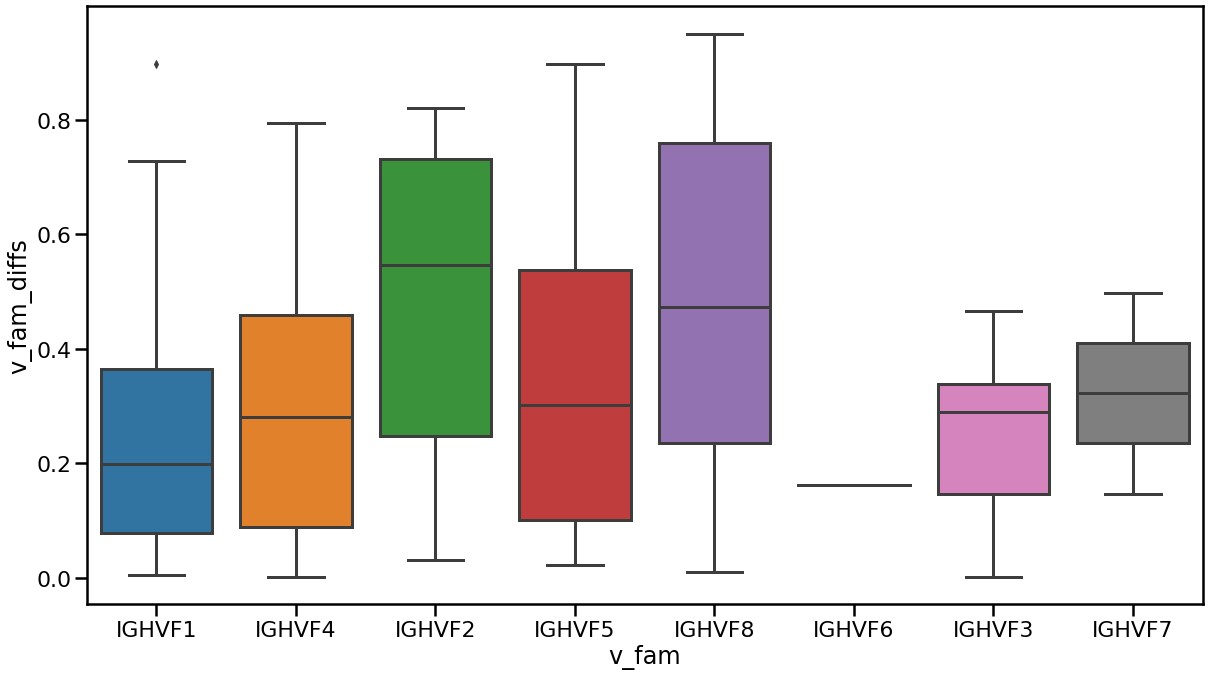

In [18]:
sns.boxplot(data=vfam_df,y='v_fam_diffs',x='v_fam')

In [19]:
top_two_errors = 0
top_three_errors = 0
for ax,row in tqdm(enumerate(pred_v_family)):
    asorted = np.argsort(row)
    if call_maps['v_family'][asorted[-1]] != new_data.loc[ax,'v_call'].split('-')[0] and call_maps['v_family'][asorted[-2]] != new_data.loc[ax,'v_call'].split('-')[0]:
        top_two_errors+=1
    if call_maps['v_family'][asorted[-1]] != new_data.loc[ax,'v_call'].split('-')[0] \
    and\
    call_maps['v_family'][asorted[-2]] != new_data.loc[ax,'v_call'].split('-')[0]\
    and\
    call_maps['v_family'][asorted[-3]] != new_data.loc[ax,'v_call'].split('-')[0]\
    :
        top_three_errors+=1

0it [00:00, ?it/s]

In [22]:
print('Top 1:',len(v_families))
print('Top 2: ',top_two_errors)
print('Top 3: ',top_three_errors)

Top 1: 138
Top 2:  33
Top 3:  13


### V Gene

In [23]:
v_gene = []
v_gene_diffs = []

make_gene = lambda familiy,gene: call_maps['v_family'][familiy]+'-'+call_maps['v_gene'][gene]

for ax,(F,G) in tqdm(enumerate(zip(pred_v_family,pred_v_gene))):
    
    asorted_F = np.argsort(F)
    asorted_G = np.argsort(G)

    true_gene = new_data.loc[ax,'v_call'].split('*')[0]
    
    if make_gene(asorted_F[-1],asorted_G[-1]) != true_gene:
        v_gene.append(true_gene)
        v_gene_diffs.append(G[asorted_G[-1]]-G[asorted_G[-2]])

0it [00:00, ?it/s]

In [24]:
vgene_df = pd.DataFrame({'v_gene':v_gene,'v_gene_diffs':v_gene_diffs})

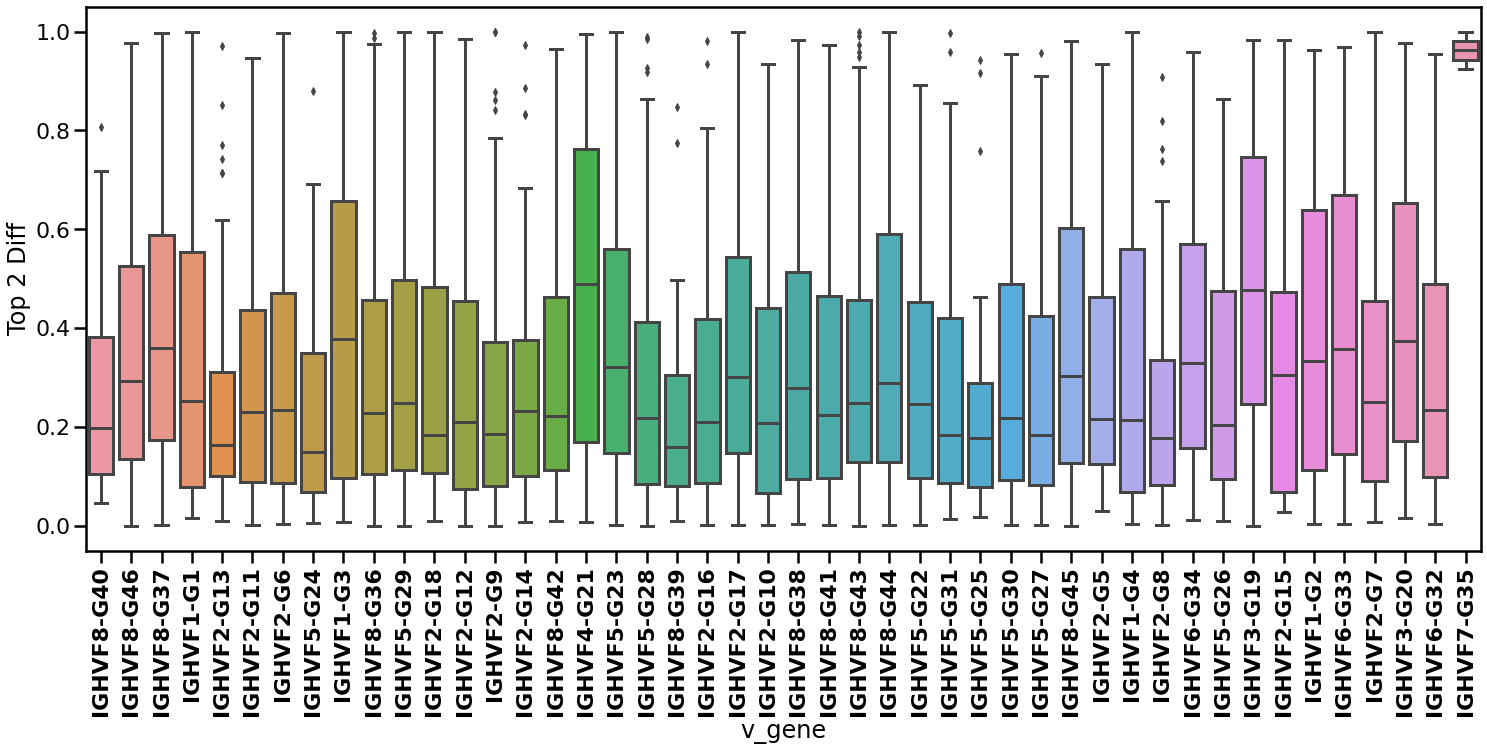

In [25]:
plt.figure(figsize=(25,10))
sns.boxplot(data=vgene_df,y='v_gene_diffs',x='v_gene')
plt.xticks(rotation=90,weight='bold')
plt.ylabel("Top 2 Diff")
plt.show()

In [26]:
top_two_errors = 0
top_three_errors = 0
for ax,(F,G) in tqdm(enumerate(zip(pred_v_family,pred_v_gene))):
    
    asorted_F = np.argsort(F)
    asorted_G = np.argsort(G)

    true_gene = new_data.loc[ax,'v_call'].split('*')[0]
    
    top1 = make_gene(asorted_F[-1],asorted_G[-1])
    top2 = make_gene(asorted_F[-1],asorted_G[-2])
    top3 = make_gene(asorted_F[-1],asorted_G[-3])

    if true_gene != top1 and true_gene != top2:
        top_two_errors+=1
    if true_gene != top1 and true_gene != top2 and true_gene!= top3:
        top_three_errors+=1

0it [00:00, ?it/s]

In [27]:
print('Top 1:',len(v_gene))
print('Top 2: ',top_two_errors)
print('Top 3: ',top_three_errors)

Top 1: 4001
Top 2:  1152
Top 3:  610


### V Allele

In [28]:
v_allele = []
v_allele_diffs = []

make_allele = lambda familiy,gene,allele: call_maps['v_family'][familiy]+'-'+call_maps['v_gene'][gene]+'*'+call_maps['v_allele'][allele]

for ax,(F,G,A) in tqdm(enumerate(zip(pred_v_family,pred_v_gene,pred_v_allele))):
    
    asorted_F = np.argsort(F)
    asorted_G = np.argsort(G)
    asorted_A = np.argsort(A)

    true_allele = new_data.loc[ax,'v_call']
    
    if make_allele(asorted_F[-1],asorted_G[-1],asorted_A[-1]) != true_allele:
        v_allele.append(true_allele)
        v_allele_diffs.append(A[asorted_A[-1]]-A[asorted_A[-2]])

0it [00:00, ?it/s]

In [29]:
vallele_df = pd.DataFrame({'v_allele':v_allele,'v_allele_diffs':v_allele_diffs})
vallele_df = vallele_df.sort_values(by='v_allele_diffs')

In [30]:
means_allele_df = vallele_df.groupby('v_allele').median().reset_index()
means_allele_df

,v_allele,v_allele_diffs
0,IGHVF1-G1*01,0.768168
1,IGHVF1-G2*01,0.927964
2,IGHVF1-G2*02,0.791418
3,IGHVF1-G3*02,0.357155
4,IGHVF1-G3*04,0.458797
...,...,...
83,IGHVF8-G44*05,0.260770
84,IGHVF8-G45*02,0.455830
85,IGHVF8-G45*07,0.467514
86,IGHVF8-G46*01,0.302895


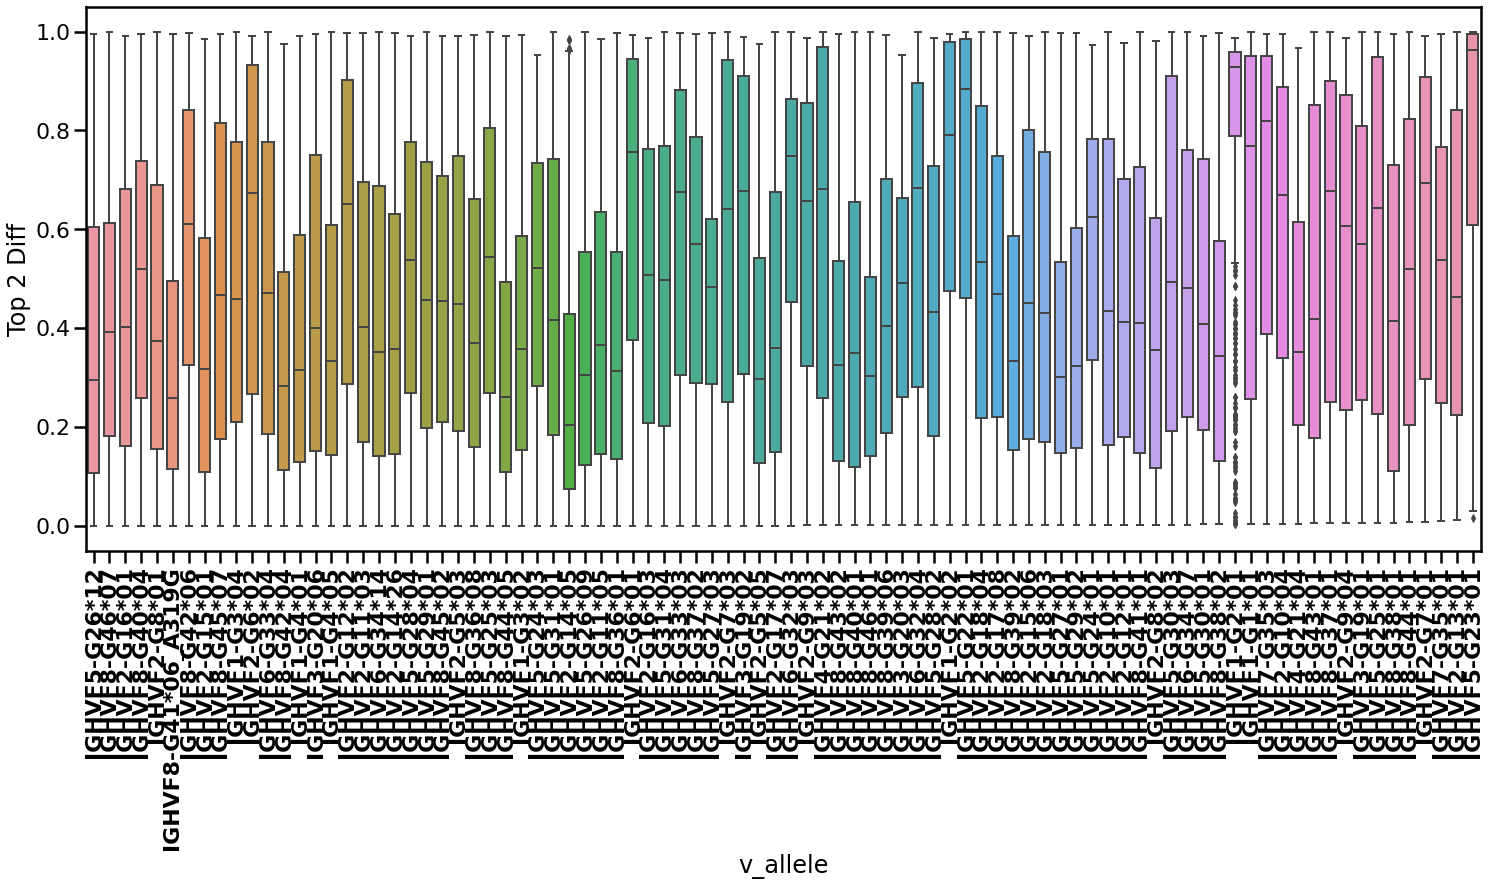

In [31]:
plt.figure(figsize=(25,10))
sns.boxplot(data=vallele_df,y='v_allele_diffs',x='v_allele',width=0.7,linewidth=2)
plt.xticks(rotation=90,weight='bold')
plt.ylabel("Top 2 Diff")
plt.show()

In [32]:
top_two_errors = 0
top_three_errors = 0

for ax,(F,G,A) in tqdm(enumerate(zip(pred_v_family,pred_v_gene,pred_v_allele))):
    
    asorted_F = np.argsort(F)
    asorted_G = np.argsort(G)
    asorted_A = np.argsort(A)

    true_allele = new_data.loc[ax,'v_call']
    
    top1 = make_allele(asorted_F[-1],asorted_G[-1],asorted_A[-1])
    top2 = make_allele(asorted_F[-1],asorted_G[-1],asorted_A[-2])
    top3 = make_allele(asorted_F[-1],asorted_G[-1],asorted_A[-3])

    if true_allele != top1 and true_allele != top2:
        top_two_errors+=1
    if true_allele != top1 and true_allele != top2 and true_allele!= top3:
        top_three_errors+=1

0it [00:00, ?it/s]

In [33]:
print('Top 1:',len(v_allele))
print('Top 2: ',top_two_errors)
print('Top 3: ',top_three_errors)

Top 1: 87168
Top 2:  27799
Top 3:  12847


## Confusion Analysis

In [34]:
v_allele_sm = dict()

make_allele = lambda familiy,gene,allele: call_maps['v_family'][familiy]+'-'+call_maps['v_gene'][gene]+'*'+call_maps['v_allele'][allele]

for ax,(F,G,A) in tqdm(enumerate(zip(pred_v_family,pred_v_gene,pred_v_allele))):
    
    asorted_F = np.argsort(F)
    asorted_G = np.argsort(G)
    asorted_A = np.argsort(A)

    true_allele = new_data.loc[ax,'v_call']
    
    
    if make_allele(asorted_F[-1],asorted_G[-1],asorted_A[-1]) != true_allele:
        v_allele_sm[true_allele] = v_allele_sm.get(true_allele,[])+[A]

0it [00:00, ?it/s]

In [35]:
for key in v_allele_sm:
    v_allele_sm[key] = np.vstack(v_allele_sm[key])

In [36]:
vcdf = pd.DataFrame(np.vstack([v_allele_sm[key].mean(axis=0) for key in v_allele_sm]),
            index = v_allele_sm,columns=UBdataset.v_allele_call_ohe)
vcdf = vcdf.loc[sorted(vcdf.index.to_list()),:]

<AxesSubplot:>

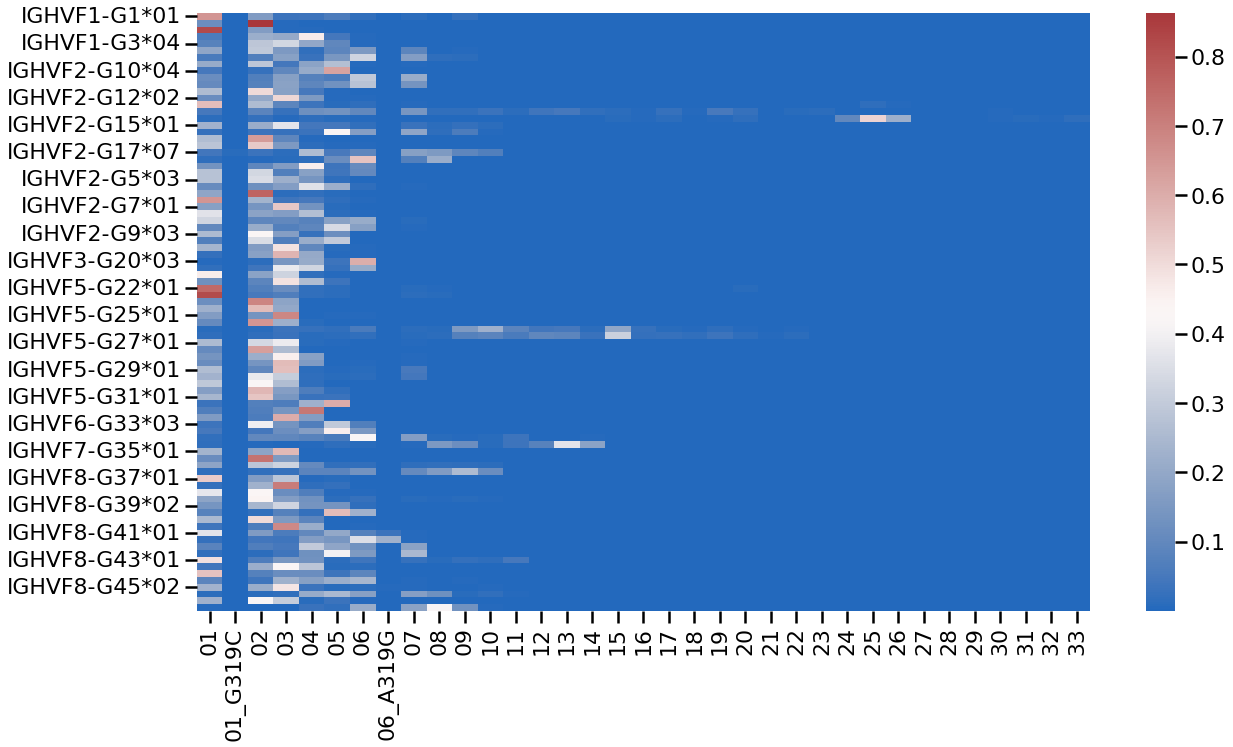

In [37]:
sns.heatmap(vcdf,cmap='vlag')

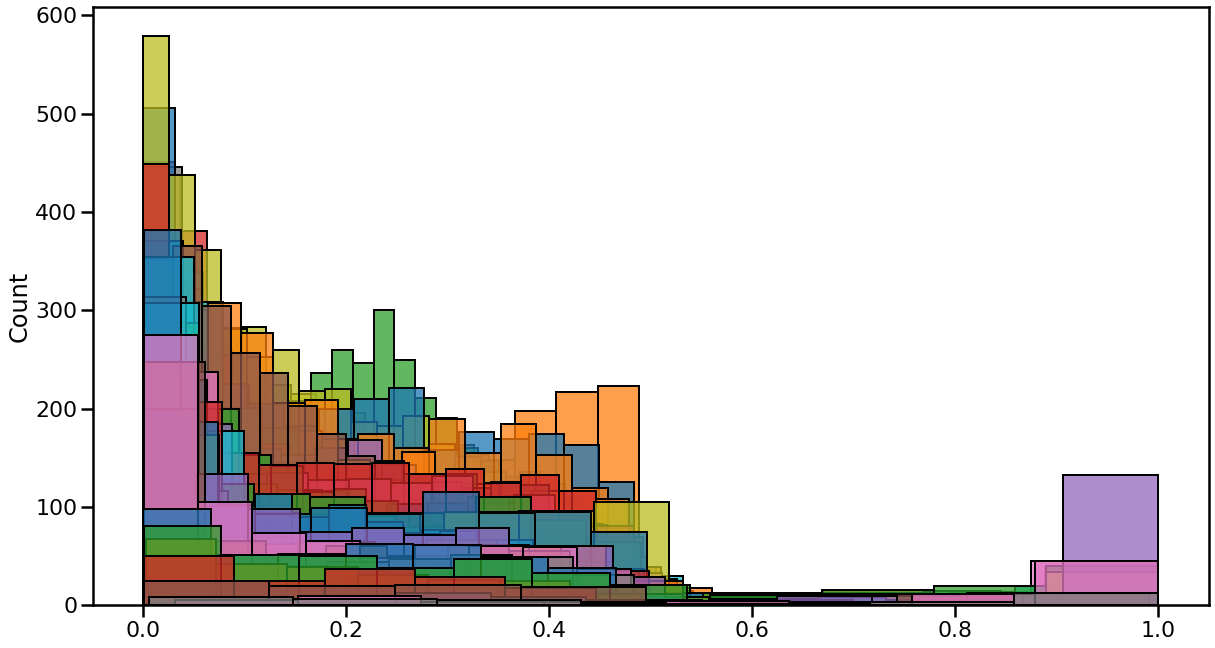

In [38]:

for key in v_allele_sm:
    sns.histplot(v_allele_sm[key][:,UBdataset.v_allele_call_ohe[key.split('*')[1]]],label=key)

### IGBLAST Was Correct While We Werent

In [39]:
v_allele_sm = dict()

make_allele = lambda familiy,gene,allele: call_maps['v_family'][familiy]+'-'+call_maps['v_gene'][gene]+'*'+call_maps['v_allele'][allele]
igb_correct = 0
vdeepj_correct = 0
vdeepj_correct_igb_inccorect = 0
igb_correct_vdeepj_inccorect = 0
both_igb_vdeepj_corret = 0
seq_err_df = dict()
for ax,(F,G,A) in tqdm(enumerate(zip(pred_v_family,pred_v_gene,pred_v_allele))):
    
    asorted_F = np.argsort(F)
    asorted_G = np.argsort(G)
    asorted_A = np.argsort(A)

    true_allele = new_data.loc[ax,'v_call']
    igb_allele = IGB.loc[ax,'v_call']
    seq = new_data.loc[ax,'sequence'][(new_data.loc[ax,'v_sequence_start']-1):(new_data.loc[ax,'v_sequence_end']-1)]
    
    if make_allele(asorted_F[-1],asorted_G[-1],asorted_A[-1]) != true_allele and igb_allele == true_allele:
        v_allele_sm[true_allele] = v_allele_sm.get(true_allele,[])+[A]
        seq_err_df[true_allele] = seq_err_df.get(true_allele,[])+[seq]
        igb_correct_vdeepj_inccorect+=1
        
    if make_allele(asorted_F[-1],asorted_G[-1],asorted_A[-1]) == true_allele:
        vdeepj_correct+=1
    if igb_allele == true_allele:
        igb_correct+=1
    if make_allele(asorted_F[-1],asorted_G[-1],asorted_A[-1]) == true_allele and igb_allele != true_allele:
        vdeepj_correct_igb_inccorect+=1
    if make_allele(asorted_F[-1],asorted_G[-1],asorted_A[-1]) == true_allele and igb_allele == true_allele:
        both_igb_vdeepj_corret+=1

0it [00:00, ?it/s]

In [40]:
igb_vdeepj_naive_summary = f"""
igb_correct: {igb_correct/len(pred_d_allele)}
vdeepj_correct: {vdeepj_correct/len(pred_d_allele)}
vdeepj_correct_igb_inccorect : {vdeepj_correct_igb_inccorect/len(pred_d_allele)}
igb_correct_vdeepj_inccorect : {igb_correct_vdeepj_inccorect/len(pred_d_allele)}
both_igb_vdeepj_corret : {both_igb_vdeepj_corret/len(pred_d_allele)}

"""
print(igb_vdeepj_naive_summary)


igb_correct: 0.8674415184640888
vdeepj_correct: 0.91279615922144
vdeepj_correct_igb_inccorect : 0.06870023579691253
igb_correct_vdeepj_inccorect : 0.02334559503956126
both_igb_vdeepj_corret : 0.8440959234245274




In [41]:
for key in v_allele_sm:
    v_allele_sm[key] = np.vstack(v_allele_sm[key])

In [47]:
v_allele_sm[list(v_allele_sm)[0]].shape

(470, 35)

In [48]:
igb_superior = list(map(lambda x: len(v_allele_sm[x]),v_allele_sm) ) 
igb_superior = pd.DataFrame({'v':list(v_allele_sm),'count':igb_superior}).sort_values(by='count')


In [49]:
igb_superior['count'].sum()

23336

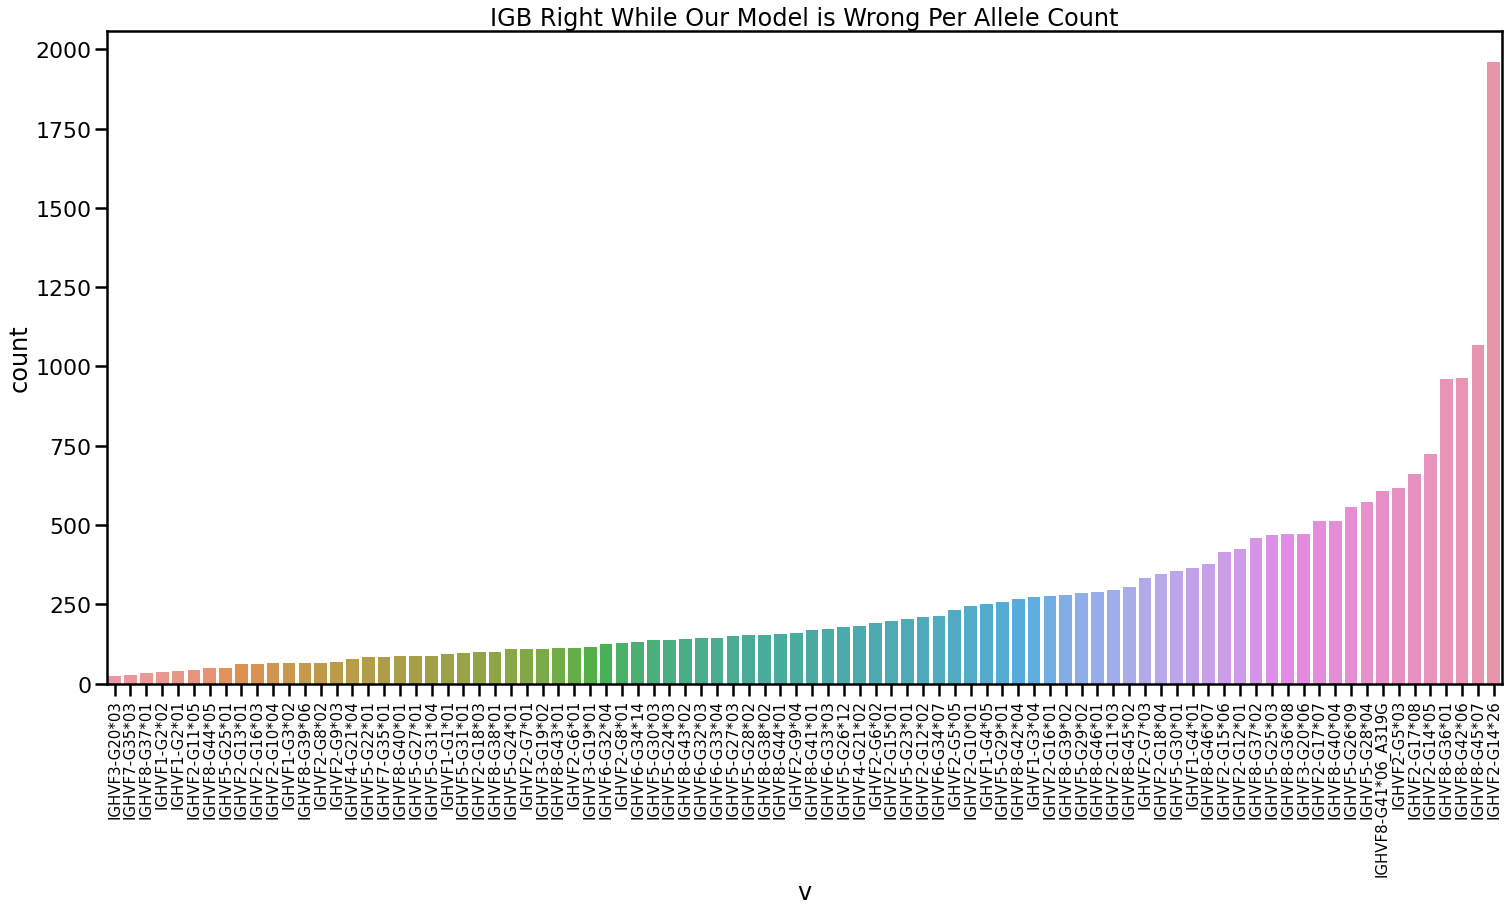

In [50]:
plt.figure(figsize=(25,12))
plt.title('IGB Right While Our Model is Wrong Per Allele Count')
sns.barplot(data=igb_superior,x='v',y='count')
plt.xticks(rotation=90,size=15)
plt.show()

In [51]:
igb_superior

,v,count
85,IGHVF3-G20*03,25
64,IGHVF7-G35*03,28
82,IGHVF8-G37*01,32
81,IGHVF1-G2*02,36
66,IGHVF1-G2*01,39
...,...,...
1,IGHVF2-G14*05,725
7,IGHVF8-G36*01,959
18,IGHVF8-G42*06,963
13,IGHVF8-G45*07,1069


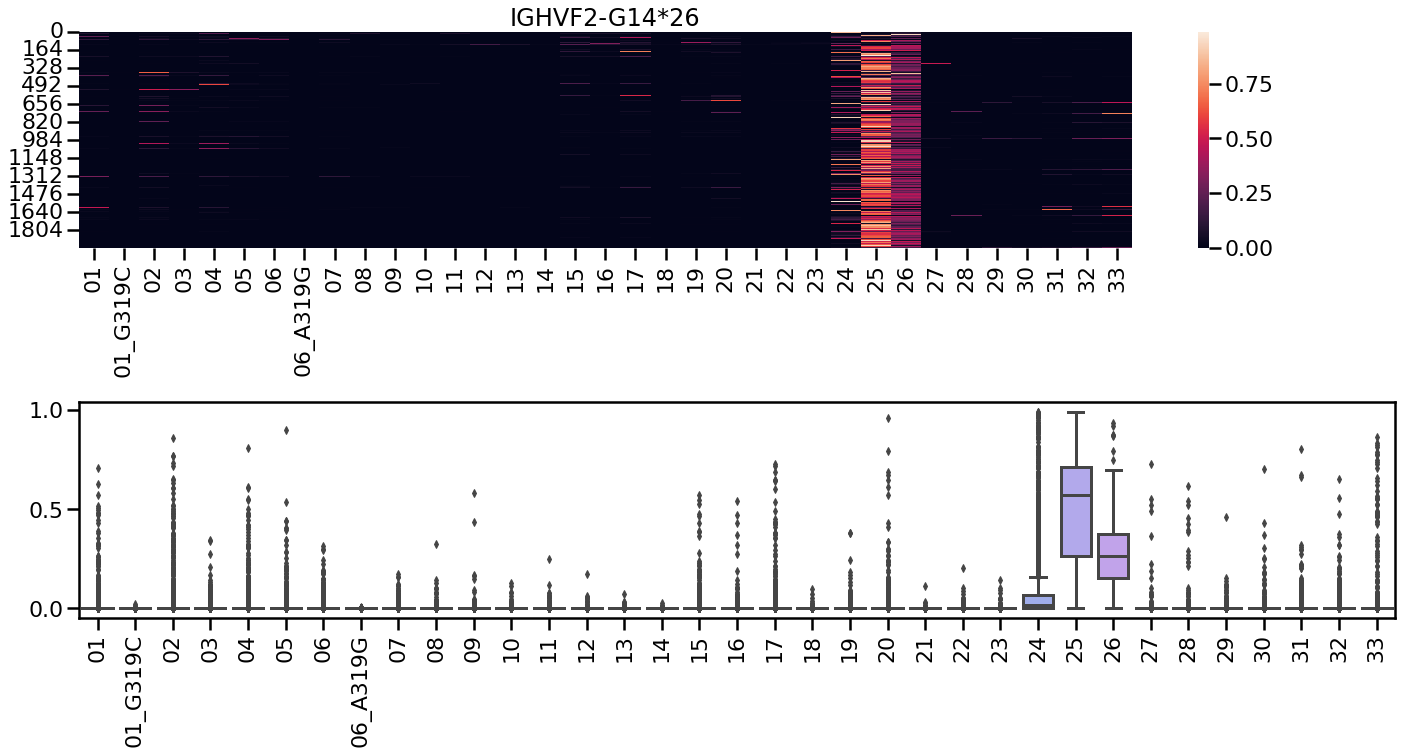

In [52]:
K = 'IGHVF2-G14*26'
plt.subplot(2,1,1)
plt.title(K)
sns.heatmap(v_allele_sm[K],xticklabels=list(UBdataset.v_allele_call_ohe))
plt.subplot(2,1,2)
ax=sns.boxplot(v_allele_sm[K])
ax.set_xticklabels(list(UBdataset.v_allele_call_ohe),rotation=90)

plt.tight_layout()

In [53]:
UBdataset.v_allele_count+UBdataset.v_gene_count+UBdataset.v_family_count

89

In [54]:
from Levenshtein import distance
A1 = 'IGHVF2-G14*26'
A2 = 'IGHVF2-G14*25'

A1 = list(filter(lambda x: x.name == A1,UBdataset.locus[0]['V']))[0].ungapped_seq
A2 = list(filter(lambda x: x.name == A2,UBdataset.locus[0]['V']))[0].ungapped_seq

distance(A1,A2)


3

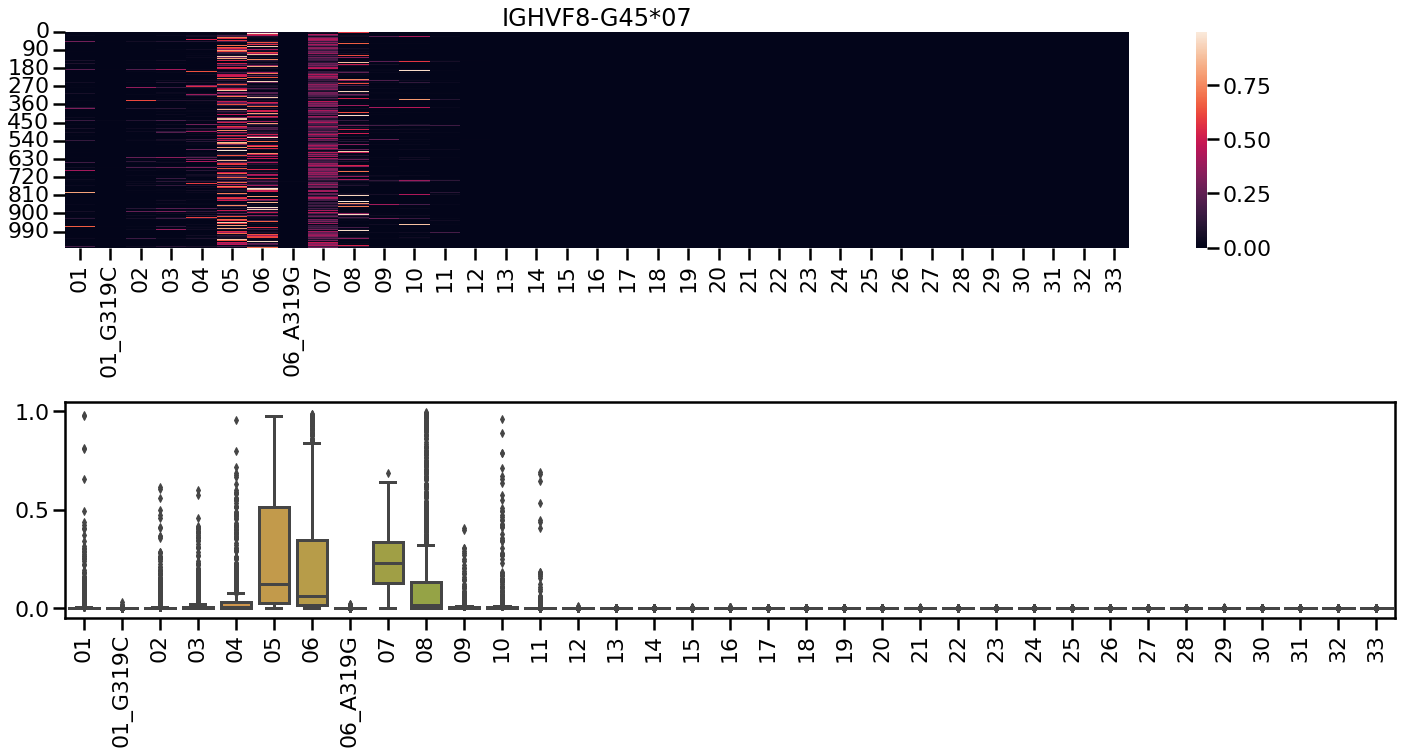

In [55]:
K = 'IGHVF8-G45*07'
plt.subplot(2,1,1)
plt.title(K)
sns.heatmap(v_allele_sm[K],xticklabels=list(UBdataset.v_allele_call_ohe))
plt.subplot(2,1,2)
ax=sns.boxplot(v_allele_sm[K])
ax.set_xticklabels(list(UBdataset.v_allele_call_ohe),rotation=90)

plt.tight_layout()

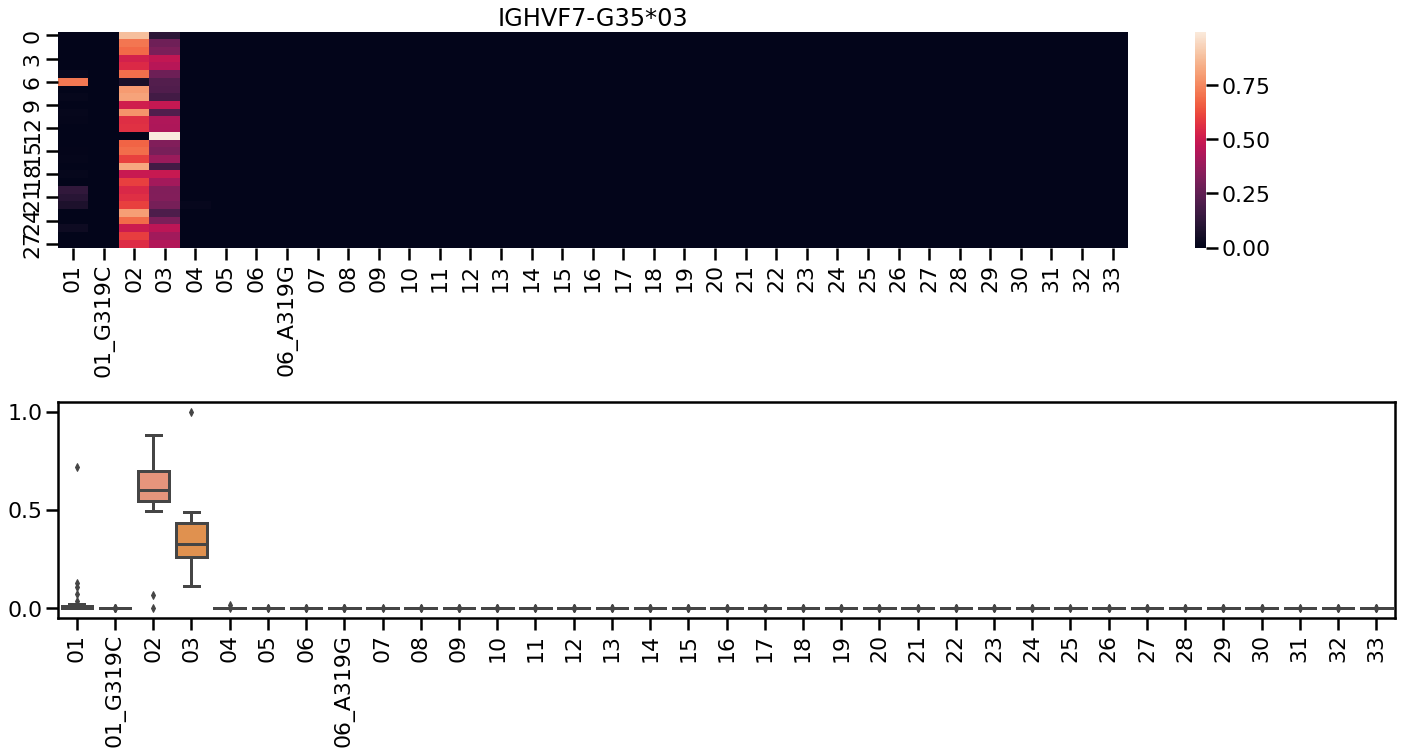

In [56]:
K = 'IGHVF7-G35*03'
plt.subplot(2,1,1)
plt.title(K)
sns.heatmap(v_allele_sm[K],xticklabels=list(UBdataset.v_allele_call_ohe))
plt.subplot(2,1,2)
ax=sns.boxplot(v_allele_sm[K])
ax.set_xticklabels(list(UBdataset.v_allele_call_ohe),rotation=90)

plt.tight_layout()

In [57]:
from collections import defaultdict,Counter
K = 'IGHVF2-G14*26'
err_pos = defaultdict(Counter)
for seq in seq_err_df[K]:
    for pos,nuc in enumerate(seq):
        err_pos[pos].update(nuc)

In [58]:
from scipy.stats import entropy
pos_entropy = defaultdict(lambda x: 0)
for i in err_pos:
    pos_entropy[i] = (entropy(list(err_pos[i].values())))
pos_entropy = pd.Series(pos_entropy)

<StemContainer object of 3 artists>

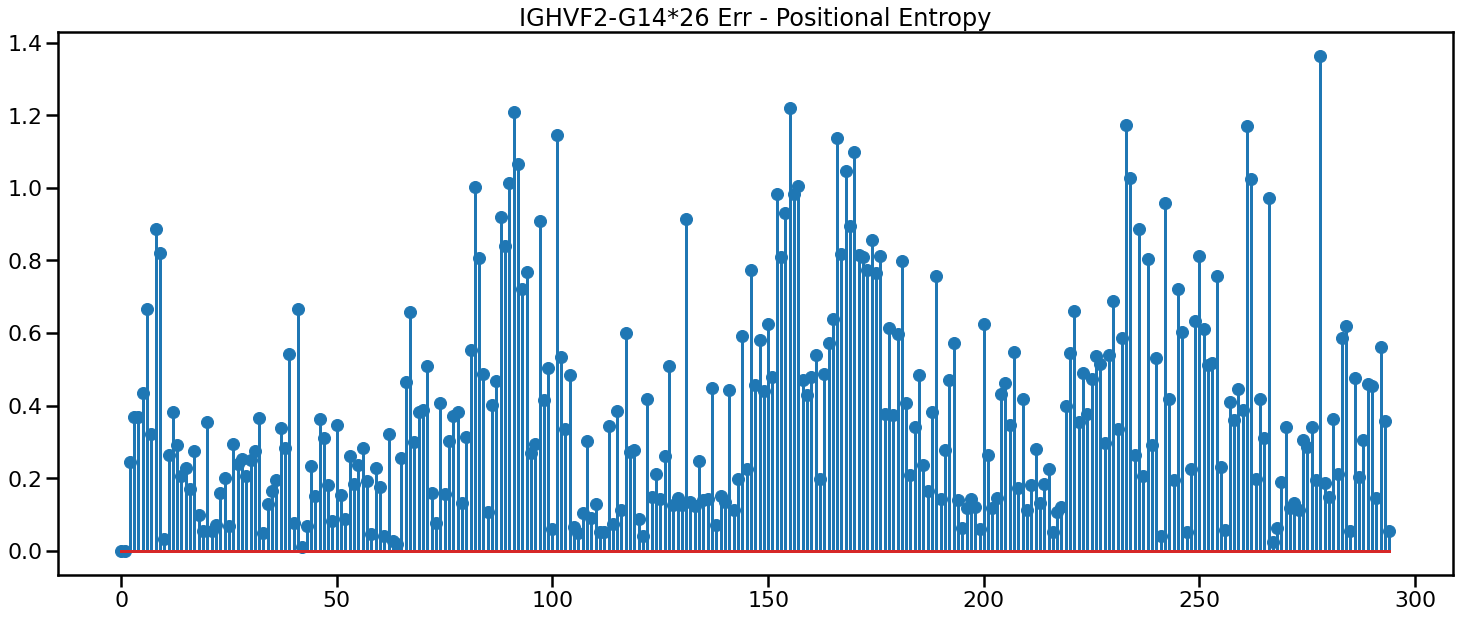

In [59]:
plt.figure(figsize=(25,10))
plt.title(f'{K} Err - Positional Entropy')
plt.stem(pos_entropy)

In [42]:
K = 'IGHVF7-G35*03'
K2 = 'IGHVF7-G35*02'
v_allele_sm[K]

array([[5.5137468e-03, 4.7810211e-08, 5.9685576e-01, ..., 9.6063012e-16,
        8.5808937e-17, 1.3974360e-16],
       [4.2710623e-01, 5.1838419e-06, 2.4670541e-01, ..., 1.5949637e-15,
        5.9605611e-15, 4.0105341e-15],
       [2.8501049e-04, 5.1525594e-06, 7.5301683e-01, ..., 1.1973787e-11,
        3.2319037e-12, 8.7819248e-12],
       ...,
       [7.9295458e-03, 1.2039806e-04, 5.9960479e-01, ..., 1.6685955e-10,
        8.6343314e-11, 1.0068001e-10],
       [2.2726200e-04, 4.9123173e-08, 5.0368714e-01, ..., 6.7758038e-10,
        1.2694605e-09, 1.9916413e-09],
       [1.7499256e-04, 1.0037270e-05, 9.1388601e-01, ..., 2.9318665e-09,
        9.6734154e-10, 1.4750873e-09]], dtype=float32)

In [55]:
from Levenshtein import distance
allele_1 = tuple(filter(lambda x: x.name == K,UBdataset.locus[0]['V']))
allele_2 = tuple(filter(lambda x: x.name == K2,UBdataset.locus[0]['V']))

allele_1 = allele_1[0].ungapped_seq
allele_2 = allele_2[0].ungapped_seq

In [56]:
distance(allele_1,allele_2)

3